In [20]:
%load_ext autoreload
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
from atpy import bellhop
from matplotlib import gridspec

In [2]:
loadName = '/Users/edwardlrichards/cir_processing/Enviornment/processedData/soundSpeedProfile.pic'
# bellhop = '/Users/edwardlrichards/acousticModels/at/bin/bellhop.exe'
filesDir = '/Users/edwardlrichards/cir_processing/bellhopFiles/'
ctdData = pd.read_pickle(loadName)
rd = 52.4
sd = 93.5

In [3]:
for t in ctdData.columns: print(t.strftime('J%j %H:%M'))

J187 05:27
J185 03:05
J185 02:30
J184 21:37
J184 20:45
J179 16:54
J176 19:22
J175 23:33
J175 19:48
J192 06:42
J187 07:23
J187 06:30


In [14]:
profile = ctdData.iloc[:, 4]
zProfile = ctdData.index[np.bitwise_not(np.isnan(profile))]
profile = profile[np.bitwise_not(np.isnan(profile))]
profile = np.interp(ctdData.index, zProfile, profile)
profile=pd.Series(profile,index=ctdData.index)

In [5]:
#Extend CTD to bottom
bellPath = bellhop.writeBellhop(np.array(ctdData.index), profile, 'E',\
                        saveDir=filesDir, sourceD=sd, receiveD=rd)

In [6]:
bellhop.runBellhop(bellPath)

In [15]:
beams = bellhop.read_rayFile(bellPath)

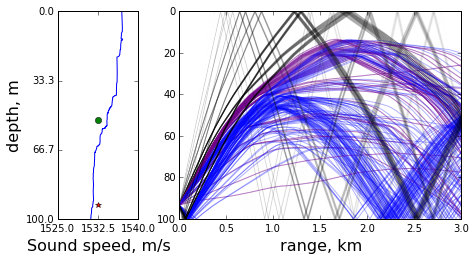

In [16]:

yBound_1=(0,100)
xBound_1=(1525,1540)
yBound_2=(100,0)
xBound_2=(0,3)

fig = plt.figure(figsize=(8, 4)) 
gs=gridspec.GridSpec(100,100,bottom=0.18,left=0.18,right=0.88) 

_=ax1 = plt.subplot(gs[:,:20])
_=ax1.plot(profile, np.array(ctdData.index))
_=ax1.set_xlim(xBound_1[0], xBound_1[1])
_=ax1.set_ylim(yBound_1[1], yBound_1[0])
_=ax1.set_xticks(np.r_[xBound_1[0]:xBound_1[1]:3j])
_=ax1.set_yticks(np.r_[yBound_1[1]:yBound_1[0]:4j])
_=ax1.set_xlabel('Sound speed, m/s', fontsize=16)
_=ax1.set_ylabel('depth, m', fontsize=16)
_=ax1.plot(np.mean((xBound_1[0], xBound_1[1])), rd, 'go')
# Plot the source and receiver depth on the sound speed profile
_=ax1.plot(np.mean((xBound_1[0], xBound_1[1])), sd, 'r*')
_=ax2 = plt.subplot(gs[:,30:100])

for b in beams:
    if b['numTopBnc'] == 0 and b['numBotBnc'] == 0:
        _=ax2.plot(b['beamPath'][:,0]/1e3,b['beamPath'][:,1],\
                     'r', alpha=0.3)
    if b['numTopBnc'] == 0:
        _=ax2.plot(b['beamPath'][:,0]/1e3,b['beamPath'][:,1],\
                     'b', alpha=0.3)
    else:
        _=ax2.plot(b['beamPath'][:,0]/1e3,b['beamPath'][:,1],\
                     'k', alpha=0.3 ** b['numTopBnc'])
        
_=ax2.set_xlabel('range, km', fontsize=16)
_=plt.ylim(yBound_2)
_=plt.xlim(xBound_2)